In [1]:
import os
import pandas as pd

# Merging Sales Data available

In [2]:
path="./Data"
# df=pd.read_csv("./Data/Sales_April_2019.csv")

all_Data=pd.DataFrame()
files=[file for file in os.listdir('./data')]

for file in files:
    # print(file)
    df=pd.read_csv('./Data/'+file)
    all_Data=pd.concat([all_Data,df])


all_Data.to_csv("all_Data.csv",index=False)

##Data Cleaning

Drop rows of NAN

In [3]:
#find NAN
# nan_df=all_Data[all_Data.isna().any(axis=1)]
# nan_df
all_Data=all_Data.dropna(how='all')

Removing text in "Order Date Column

In [19]:
all_Data=all_Data[all_Data['Order Date'].str[0:2]!='Or']
all_Data.shape

(185950, 12)

Make Columns correct type

In [5]:
all_Data['Quantity Ordered']=pd.to_numeric(all_Data['Quantity Ordered'])
all_Data['Price Each']=pd.to_numeric(all_Data['Price Each'])

Augment data with additional columns

Adding month column

In [6]:
all_Data['Month']=all_Data['Order Date'].str[0:2]
all_Data['Month']=all_Data['Month'].astype('int32')

#alternative to add 'Month' Column
# all_Data['Month']=pd.to_datetime(all_Data['Order Date']).dt.month
# all_Data.head()

Adding City Column

In [7]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_Data['City'] = all_Data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


Get valuable information from Data

Question 1: what was the best month for sales? How much was earned that month

In [8]:
all_Data['Sales'] = all_Data['Quantity Ordered'].astype('int') * all_Data['Price Each'].astype('float')
all_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [9]:
all_Data[['Quantity Ordered','Price Each','Sales','Month']].groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


C:\Users\ysahu\AppData\Local\Temp\ipykernel_3116\1945284998.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,all_Data.groupby(['Month']).sum()['Sales'])


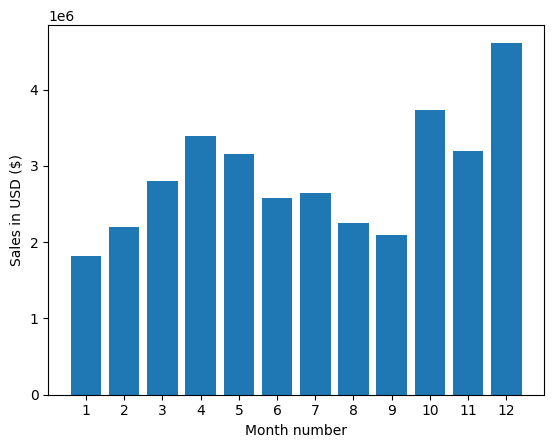

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,all_Data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


Question 2: What city sold the most product?

In [11]:
all_Data[['Quantity Ordered','Price Each','Sales','City']].groupby(['City']).sum()

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


C:\Users\ysahu\AppData\Local\Temp\ipykernel_3116\2784538643.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(cities,all_Data.groupby(['City']).sum()['Sales'])


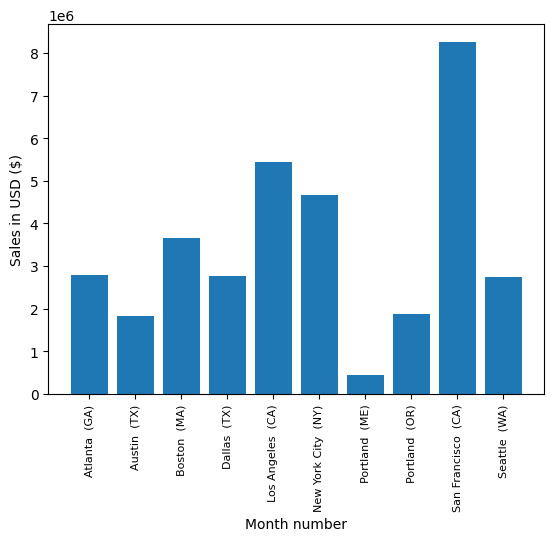

In [12]:
cities = [city for city, df in all_Data.groupby('City')]

plt.bar(cities,all_Data.groupby(['City']).sum()['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [13]:
# Add hour column
# all_Data['Order Date']=pd.to_datetime(all_Data['Order Date'])
all_Data['Hour'] = pd.to_datetime(all_Data['Order Date']).dt.hour
all_Data['Minute'] = pd.to_datetime(all_Data['Order Date']).dt.minute
all_Data['Count'] = 1
all_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


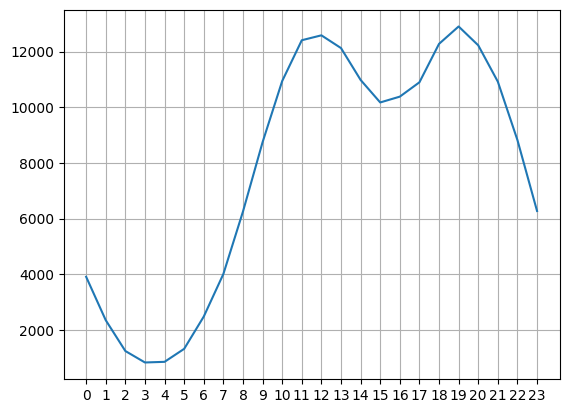

In [14]:
hours = [hour for hour, df in all_Data.groupby('Hour')]

plt.plot(hours, all_Data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.grid()
plt.show()

# Recommended time will be between 9:30 to 21:00

#### Question 4: What products are most often sold together?

In [15]:
df = all_Data[all_Data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\ysahu\AppData\Local\Temp\ipykernel_3116\1831038991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [16]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question5: What product sold the most? Why do you think it sold the most?

C:\Users\ysahu\AppData\Local\Temp\ipykernel_3116\1178801231.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


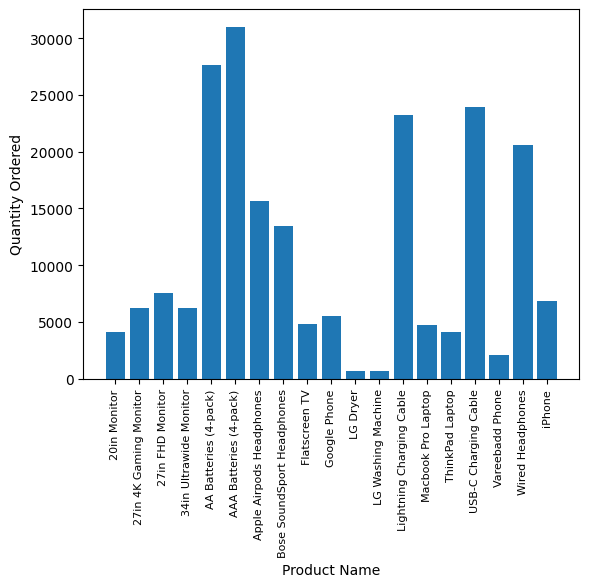

In [17]:
product_group = all_Data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\ysahu\AppData\Local\Temp\ipykernel_3116\3054639813.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\ysahu\AppData\Local\Temp\ipykernel_3116\3054639813.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


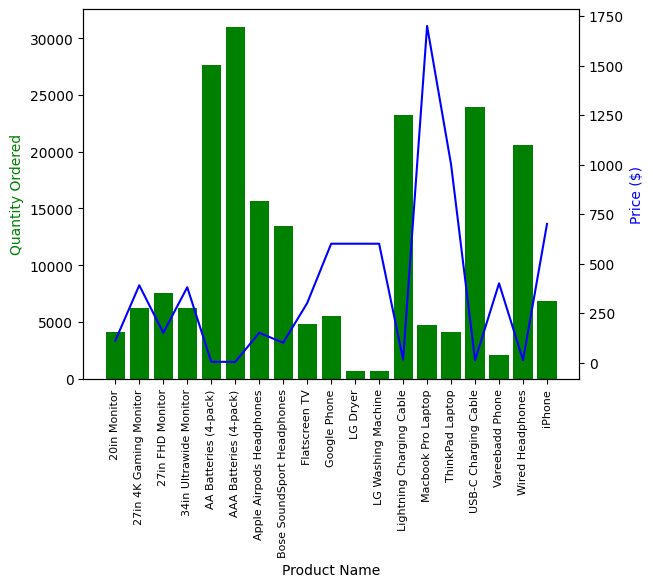

In [18]:
prices = all_Data.groupby('Product').mean('Price Each')['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()